<IPython.core.display.Javascript object>


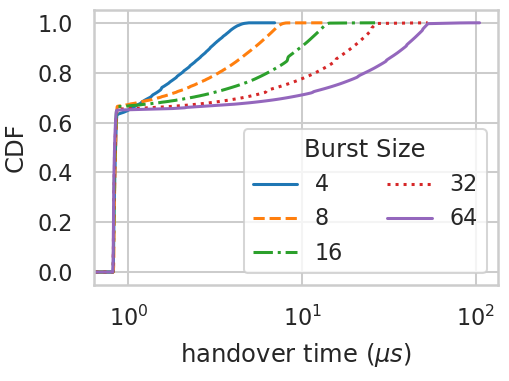

Loading from memo/burst_ecdf/get_burst_ecdf__expDir-burstDataburst_4.pickle
:: Cached stdout:
 :: burstData/burst_4 -- 3558.4  :: 

Loading from memo/burst_ecdf/get_burst_ecdf__expDir-burstDataburst_8.pickle
:: Cached stdout:
 :: burstData/burst_8 -- 3564.45  :: 

Loading from memo/burst_ecdf/get_burst_ecdf__expDir-burstDataburst_16.pickle
:: Cached stdout:
 :: burstData/burst_16 -- 3561.6  :: 

Loading from memo/burst_ecdf/get_burst_ecdf__expDir-burstDataburst_32.pickle
:: Cached stdout:
 :: burstData/burst_32 -- 3598.55  :: 

Loading from memo/burst_ecdf/get_burst_ecdf__expDir-burstDataburst_64.pickle
:: Cached stdout:
 :: burstData/burst_64 -- 3590.1  :: 



In [9]:
%matplotlib notebook

import os
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from Memoizer import memoize_to_folder
import seaborn as sns

FIGSIZE=(4*.7,3*.7)

sns.set_style("whitegrid")
sns.set_context('paper')
PARSE = False


@memoize_to_folder('memo/burst_ecdf')
def get_burst_ecdf(expDir):
    tputs = [int(V) for V in open(expDir + "/rxBw.csv")]
    print ("%s -- %s "%(expDir, np.average(tputs)))
    latencies = np.load(expDir + "/telemetry.pcap.ofExecutionDeltas.npy")
    latencies = latencies / 1000.0
    ecdf = ECDF(latencies)
    return ecdf.x[::100], ecdf.y[::100]

def plotBurstCDFs(expBase):
    plt.figure(figsize = FIGSIZE)
    burstLens = [4, 8, 16, 32, 64]
    linestyles = ["solid", "--", "-.", ":", "solid"]
    for i, burstLen in enumerate(burstLens):
        expDir = "%s_%s"%(expBase, burstLen)
        x, y = get_burst_ecdf(expDir)
        plt.plot(x, y, "-", linestyle=linestyles[i], label = "%s"%(burstLen))
    plt.xlabel(r"handover time ($\mu s$)")
    plt.ylabel("CDF")
    plt.xscale("log")
    plt.legend(title = "Burst Size", ncol=2, loc="lower right")
    plt.tight_layout(pad=.1)
    plt.savefig("BurstECDF2.pdf")
    plt.show()



def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


expDir = "burstData/burst"
plotBurstCDFs(expDir)

<IPython.core.display.Javascript object>


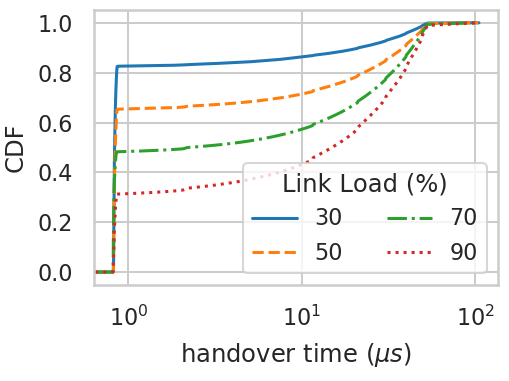

latencyData/latency_20 -- 1803.4 
latencyData/latency_40 -- 3589.1 
latencyData/latency_60 -- 5390.2 
latencyData/latency_80 -- 7148.3 


In [11]:

@memoize_to_folder('memo/lat_ecdf')
def get_lat_ecdf(expDir):
    tputs = [int(V) for V in open(expDir + "/rxBw.csv")]
    print ("%s -- %s "%(expDir, np.average(tputs)))
    latencies = np.load(expDir + "/telemetry.pcap.ofExecutionDeltas.npy")
    latencies = latencies / 1000.0
    ecdf = ECDF(latencies)
    return ecdf.x[::100], ecdf.y[::100]

def plotLatencyCDFs(expBase):
    plt.figure(figsize = FIGSIZE)
    bgLoads = [20, 40, 60, 80]

    linestyles = ["solid", "--", "-.", ":"]
    for i, load in enumerate(bgLoads):
        expDir = "%s_%s"%(expBase, load)
        ecdf_x, ecdf_y = get_lat_ecdf(expDir)
        plt.plot(ecdf_x, ecdf_y, "-", linestyle=linestyles[i], label = "%s"%(load + 10))
    plt.xlabel(r"handover time ($\mu s$)")
    plt.ylabel("CDF")
    plt.xscale("log")
    plt.legend(title = "Link Load (%)", ncol=2, loc="lower right")
    plt.tight_layout(pad=.1)
    plt.savefig("LatencyECDF2.pdf")
    plt.show()


plotLatencyCDFs("latencyData/latency")

<IPython.core.display.Javascript object>


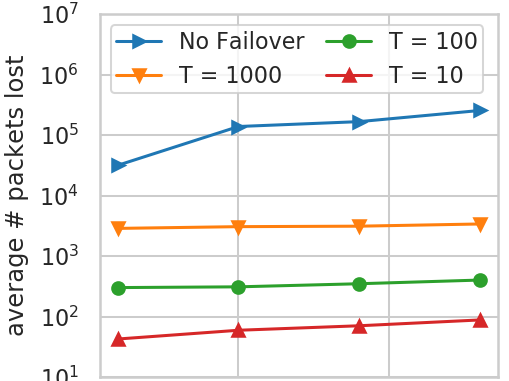

failoverTrials/failover_10000000_23_0 -- 5557.6 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10000000_23_0.pickle
:: Cached stdout:
 :: 0 packets went through alpha 2. :: 

failoverTrials/failover_10000000_23_1 -- 5058.0 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10000000_23_1.pickle
:: Cached stdout:
 :: 0 packets went through alpha 2. :: 

failoverTrials/failover_10000000_23_2 -- 5359.3 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10000000_23_2.pickle
:: Cached stdout:
 :: 0 packets went through alpha 2. :: 

failoverTrials/failover_10000000_23_3 -- 5054.35 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10000000_23_3.pickle
:: Cached stdout:
 :: 0 packets went through alpha 2. :: 

failoverTrials/failover_10000000_23_4 -- 5092.8 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10000000_23_4.pickle
:: Cached stdout:
 :: 0 packets went throug

Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10_25_2.pickle
:: Cached stdout:
 :: 3241151 packets went through alpha 2. :: 

failoverTrials/failover_10_25_3 -- 5933.15 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10_25_3.pickle
:: Cached stdout:
 :: 3246550 packets went through alpha 2. :: 

failoverTrials/failover_10_25_4 -- 5423.85 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10_25_4.pickle
:: Cached stdout:
 :: 3290347 packets went through alpha 2. :: 

failoverTrials/failover_10_25_5 -- 5427.25 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10_25_5.pickle
:: Cached stdout:
 :: 3271277 packets went through alpha 2. :: 

failoverTrials/failover_10_25_6 -- 5424.9 
Loading from memo/pkt_loss_ct/getPktLossCt__expDir-failoverTrialsfailover_10_25_6.pickle
:: Cached stdout:
 :: 3255515 packets went through alpha 2. :: 

failoverTrials/failover_10_25_7 -- 5866.55 
Loading fro

In [14]:

def checkTput(expDir):
    tputs = [int(V) for V in open(expDir + "/rxBw.csv")]
    print( "%s -- %s "%(expDir, np.average(tputs)))

@memoize_to_folder("memo/pkt_loss_ct")
def getPktLossCt(expDir):
    if (PARSE):
        parseCmd = "./parser %s/telemetry.pcap"%expDir
        os.system(parseCmd)

    isNacks = np.load(expDir + "/telemetry.pcap.ofIsNacks.npy")
    seqIds = np.load(expDir + "/telemetry.pcap.ofSeqs.npy")

    dropCounts = seqIds[np.nonzero(isNacks)]
    alphaTags = np.load(expDir + "/telemetry.pcap.ofAlphaTags.npy")
    a2seqIds = seqIds[np.nonzero(alphaTags)]
    print ("%s packets went through alpha 2."%len(a2seqIds))

    if len(dropCounts > 0):	
        return np.sum(dropCounts) - np.max(dropCounts)
    else:
        return 0
    
def plotThresholdVsLossLog(expBase):
    """
    plots packet loss rate vs burst throughput.
    """
    fig = plt.figure(figsize = FIGSIZE)
    markers = [">", "v", "o", "^", "x"]

    # thresholds = [10000000, 1000, 100, 10]
    # burstRates = [23, 25, 50]
    thresholds = [10000000, 1000, 100, 10]
    burstRates = [23, 25, 27, 29]
    trials = range(10)
    labels = []
    Xs = []
    Ys = []

    for t in thresholds:
        X = []
        Y = []
        for b in burstRates:
            pktLossVec = []
            for tid in trials:
                fn = "%s_%s_%s_%s"%(expBase, t, b, tid)
                checkTput(fn)
                totalPktLoss = getPktLossCt(fn)
                pktLossVec.append(totalPktLoss)

            X.append((b/25.0 + .10) * 10.0) 
            Y.append(np.average(pktLossVec))
        Xs.append(X)
        Ys.append(Y)
        if (t == 10000000):
            labels.append("No Failover")
        else:
            labels.append("T = %s"%t)
    for i in range(len(labels)):
        plt.plot(Xs[i], Ys[i], label = labels[i], marker = markers[i])
    plt.yscale("log")
    plt.xlabel("background traffic rate (Gb/s)")

    plt.ylim((10, 10000000))
    plt.ylabel("average # packets lost")
    plt.legend(ncol=2, loc="upper left", borderpad=.25, columnspacing=1)
    plt.tight_layout(pad=.1)
    plt.savefig("loadVsPktLossLog2.pdf")
    plt.show()
    fig.subplots_adjust(bottom=0.01)
    
plotThresholdVsLossLog("failoverTrials/failover")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42] [0.00000000e+00 1.75000000e-06 3.52000000e-06 ... 1.36909208e+01
 1.36909243e+01 1.36909278e+01]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 32 37 38 39 40 41 42] [ 2.48873781  2.48874133  2.48874484 ... 13.69091905 13.69092257
 13.69092608]


<IPython.core.display.Javascript object>


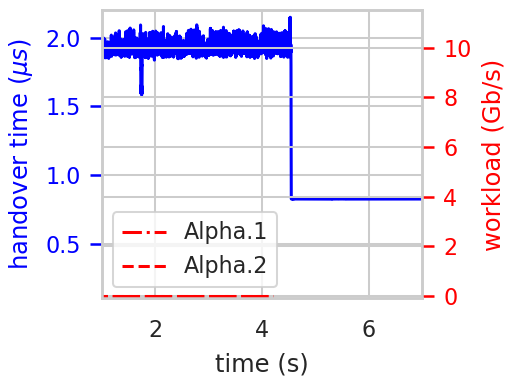

[1.0255974 1.0256072 1.025617  ... 0.824698  0.8246981 0.8246984]


In [27]:

def getGbpsXY(alpha1MSTses, alpha1MSTsesOrig, seqIds):
    X = []
    Y = []
    timeScale = 10.0
    print(alpha1MSTses, alpha1MSTsesOrig)
    for ts in alpha1MSTses:
        # indices with this ts.
        idxs = np.where(alpha1MSTsesOrig == ts)
        # sequences with this timestamp.
        seqs = seqIds[idxs]
        if (len(seqs) > 0):
            bitCt = (np.max(seqs) - np.min(seqs)) * 200 * 8
            bpsRate = bitCt * timeScale
            gbpsRate = bpsRate / 1000000000.0
        else:
            gbpsRate = 0
        # print "%s: %s"%(ts, gbpsRate)
        X.append(ts/timeScale)
        Y.append(gbpsRate)
    return X, Y


def getAvgAndLatency(expDir):
    seqIds = np.load(expDir + "/telemetry.pcap.ofSeqs.npy")
    executionDeltas = np.load(expDir + "/telemetry.pcap.ofExecutionDeltas.npy")
    alphaTags = np.load(expDir + "/telemetry.pcap.ofAlphaTags.npy")
    timestamps = np.load(expDir + "/telemetry.pcap.ofTses.npy")

    # get first alpha.2 
    alpha2Idxs = np.where(alphaTags == 1)[0]
    firstAlpha2Idx = min(alpha2Idxs)


    preLbDeltas = executionDeltas[0:firstAlpha2Idx]
    postLbDeltas = executionDeltas[firstAlpha2Idx:len(executionDeltas)]

    print (preLbDeltas)
    print( postLbDeltas)

    print ("average pre: %s"%np.average(preLbDeltas))
    print ("average post: %s"%np.average(postLbDeltas))

    print ("stddev pre: %s"%np.std(preLbDeltas))
    print ("stddev post: %s"%np.std(postLbDeltas))

# @memoize_to_folder("memo/alpha_xy")
def get_alpha_xy(expDir):
    timestamps = np.load(expDir + "/telemetry.pcap.ofTses.npy")
    
    seqIds = np.load(expDir + "/telemetry.pcap.ofSeqs.npy")
    alphaTags = np.load(expDir + "/telemetry.pcap.ofAlphaTags.npy")
    alpha1Idxs = np.where(alphaTags == 0)[0]
    alpha2Idxs = np.where(alphaTags == 1)[0]
    alpha1Tses = timestamps[alpha1Idxs]
    alpha2Tses = timestamps[alpha2Idxs]

    alpha1MSTsesOrig = (alpha1Tses/100000000)..astype(np.uint32)
    alpha2MSTsesOrig = alpha2Tses.astype(np.uint32)/100000000

    alpha1MSTses = alpha1MSTsesOrig.astype(np.uint32)
    alpha2MSTses = alpha2MSTsesOrig.astype(np.uint32)

    alpha1MSTses, alpha1MSPktCounts = np.unique(alpha1MSTses, return_counts = True)
    alpha2MSTses, alpha2MSPktCounts = np.unique(alpha2MSTses, return_counts = True)

    missingMSTses = np.arange(min(alpha1MSTses), min(alpha2MSTses))
    alpha2MSTses = np.concatenate((missingMSTses, alpha2MSTses))
    alpha2MSPktCounts = np.concatenate((np.zeros(len(missingMSTses)), alpha2MSPktCounts))

    alpha1MinSeqCounts = []
    alpha1MaxSeqCounts = []

    X1, Y1 = getGbpsXY(alpha1MSTses, alpha1MSTsesOrig, seqIds)

    X2, Y2 = getGbpsXY(alpha2MSTses, alpha2MSTsesOrig, seqIds)
    
    return X1, Y1, X2, Y2

def plotLoadVsTime(expDir):
    N = 10000

    executionDeltas = np.load(expDir + "/telemetry.pcap.ofExecutionDeltas.npy")
    timestamps = np.load(expDir + "/telemetry.pcap.ofTses.npy")


    # quit()
    # # bytes per 10 MS.
    # alpha1MSBitCounts = alpha1MSPktCounts * 200 * 8 
    # alpha2MSBitCounts = alpha2MSPktCounts * 200 * 8

    X1,Y1,X2,Y2 = get_alpha_xy(expDir)

    fig, ax1 = plt.subplots(figsize = FIGSIZE)
    # ax1.plot(alpha1MSTses[100::]/100.0, alpha1MSBitCounts[100::]*100.0/1000000000, label = "Alpha.1")
    # ax1.plot(alpha2MSTses[100::]/100.0, alpha2MSBitCounts[100::]*100.0/1000000000, label = "Alpha.2")
    ax1.plot(timestamps[N-1::]/1000000000.0, running_mean(executionDeltas/1000.0, N), color = "b")
    print( running_mean(executionDeltas/1000.0, N))
    ax1.set_ylabel(r'handover time ($\mu s$)', color = "b")
    ax1.tick_params("y", colors = "b")
    ax1.set_xlim((1, 7))
    ax1.set_ylim((.1, 2.2))
    ax1.set_xlabel("time (s)")


    ax2 = ax1.twinx()
    ax2.plot(X1, Y1, "-.", label = "Alpha.1", color = "r")
    ax2.plot(X2, Y2, "--", label = "Alpha.2", color = "r")
    ax2.set_ylabel("workload (Gb/s)", color = "r")
    ax2.tick_params('y', colors = 'r')
    ax2.set_xlim((1, 7))
    ax2.set_ylim((-.1, 11.5))
    ax2.legend(loc = "lower left")

    fig.tight_layout(pad=.1)
    plt.savefig("loadBalanceResults2.pdf")
    plt.show()

plotLoadVsTime("lbData/lb")

In [90]:
def make_gray(infile, outfile):
    os.system('rm -f {}; gs -sOutputFile={} -sDEVICE=pdfwrite -sColorConversionStrategy=Gray -dProcessColorModel=/DeviceGray -dCompatibiltyLevel=1.4 -dNOPAUSE -dBATCH {}'
              .format(outfile, outfile, infile))
    
make_gray('loadBalanceResults2.pdf', 'loadBalanceResultsGray.pdf')